What is K-means Clustering?
Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.

K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster. In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.

In some cases, K is not clearly defined, and we have to think about the optimal number of K. K Means clustering performs best data is well separated. When data points overlapped this clustering is not suitable. K Means is faster as compare to other clustering technique. It provides strong coupling between the data points. K Means cluster do not provide clear information regarding the quality of clusters. Different initial assignment of cluster centroid may lead to different clusters. Also, K Means algorithm is sensitive to noise. It maymhave stuck in local minima.

What is the objective of k-means clustering?
The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.

How k-means clustering works?

We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm, an unsupervised learning algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into.


(It will help if you think of items as points in an n-dimensional space). The algorithm will categorize the items into k groups or clusters of similarity. To calculate that similarity, we will use the Euclidean distance as a measurement.


The algorithm works as follows:  


First, we randomly initialize k points, called means or cluster centroids.
We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.

We repeat the process for a given number of iterations and at the end, we have our clusters.

The “points” mentioned above are called means because they are the mean values of the items categorized in them. To initialize these means, we have a lot of options. An intuitive method is to initialize the means at random items in the data set. Another method is to initialize the means at random values between the boundaries of the data set (if for a feature x, the items have values in [0,3], we will initialize the means with values for x at [0,3])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


Create the custom dataset with make_blobs and plot it

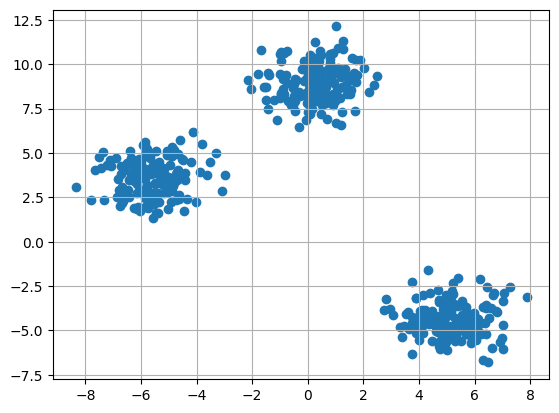

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


Initialize the random centroids
The code initializes three clusters for K-means clustering. It sets a random seed and generates random cluster centers within a specified range, and creates an empty list of points for each cluster.

In [3]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
	center = 2*(2*np.random.random((X.shape[1],))-1)
	points = []
	cluster = {
		'center' : center,
		'points' : []
	}

	clusters[idx] = cluster

clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

Plot the random initialize center with data points

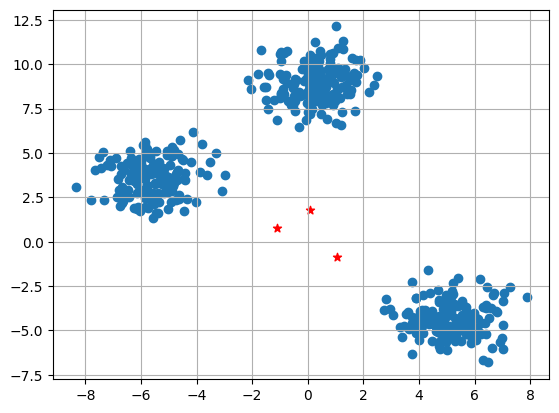

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.

Define Euclidean distance

In [5]:
def distance(p1,p2):
	return np.sqrt(np.sum((p1-p2)**2))


Create the function to Assign and Update the cluster center
The E-step assigns data points to the nearest cluster center, and the M-step updates cluster centers based on the mean of assigned points in K-means clustering.



In [6]:
#Implementing E step
def assign_clusters(X, clusters):
	for idx in range(X.shape[0]):
		dist = []

		curr_x = X[idx]

		for i in range(k):
			dis = distance(curr_x,clusters[i]['center'])
			dist.append(dis)
		curr_cluster = np.argmin(dist)
		clusters[curr_cluster]['points'].append(curr_x)
	return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
	for i in range(k):
		points = np.array(clusters[i]['points'])
		if points.shape[0] > 0:
			new_center = points.mean(axis =0)
			clusters[i]['center'] = new_center

			clusters[i]['points'] = []
	return clusters


Step 7: Create the function to Predict the cluster for the datapoints

In [7]:
def pred_cluster(X, clusters):
	pred = []
	for i in range(X.shape[0]):
		dist = []
		for j in range(k):
			dist.append(distance(X[i],clusters[j]['center']))
		pred.append(np.argmin(dist))
	return pred


Assign, Update, and predict the cluster center

In [8]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)



Plot the data points with their predicted cluster center

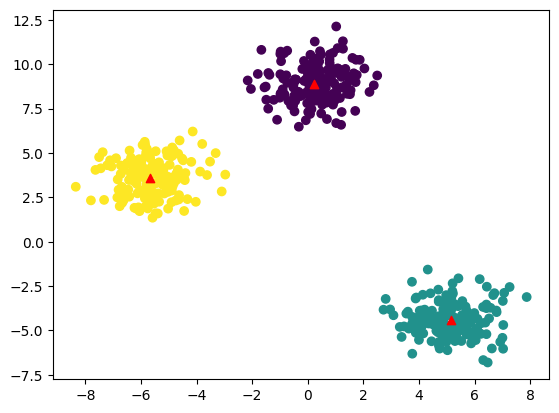

In [9]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
	center = clusters[i]['center']
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


The plot shows data points colored by their predicted clusters. The red markers represent the updated cluster centers after the E-M steps in the
K-means clustering algorithm.

Example 2

Import the necessary libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [11]:
X, y = load_iris(return_X_y=True)


Elbow Method
Finding the ideal number of groups to divide the data into is a basic stage in any unsupervised algorithm. One of the most common techniques for figuring out this ideal value of k is the elbow approach.

In [12]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
	km = KMeans(n_clusters=k, random_state=2)
	km.fit(X)
	sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plot the Elbow graph to find the optimum number of cluster

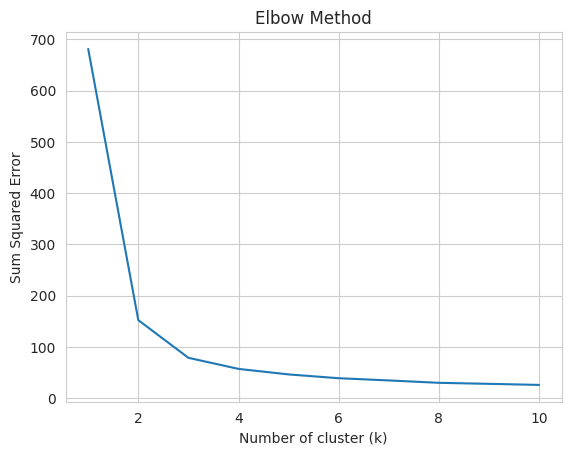

In [13]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
	ylabel = "Sum Squared Error",
	title ='Elbow Method')

plt.show()


From the above graph, we can observe that at k=2 and k=3 elbow-like situation. So, we are considering K=3


Build the Kmeans clustering model

In [14]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

Find the cluster center

In [15]:
kmeans.cluster_centers_


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])


Predict the cluster group:

In [16]:
pred = kmeans.fit_predict(X)
pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Plot the cluster center with data points

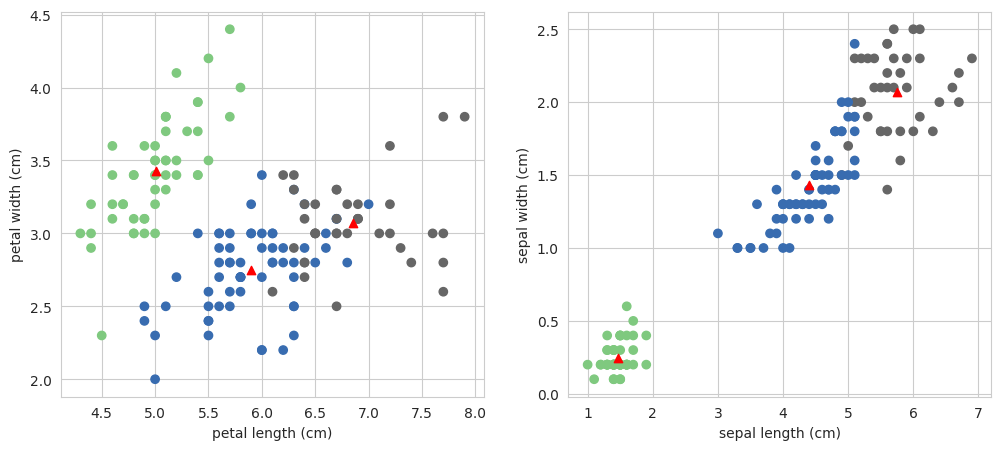

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[:2]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
	center = center[2:4]
	plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()


The subplot on the left display petal length vs. petal width with data points colored by clusters, and red markers indicate K-means cluster centers. The subplot on the right show sepal length vs. sepal width similarly.



Conclusion
In conclusion, K-means clustering is a powerful unsupervised machine learning algorithm for grouping unlabeled datasets. Its objective is to divide data into clusters, making similar data points part of the same group. The algorithm initializes cluster centroids and iteratively assigns data points to the nearest centroid, updating centroids based on the mean of points in each cluster.

Introduction To Elbow Method
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. Since we do not have any predefined number of clusters in unsupervised learning. We tend to use some method that can help us decide the best number of clusters.  In the case of K-Means clustering, we use Elbow Method for defining the best number of clustering

What Is the Elbow Method in K-Means Clustering
As we know in the k-means clustering algorithm we randomly initialize k clusters and we iteratively adjust these k clusters till these k-centroids riches in an equilibrium state. However, the main thing we do before initializing these clusters is that determine how many clusters we have to use.

For determining  K(numbers of clusters) we use Elbow method.  Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value.

WCSS - It is defined as the sum of square distances between the centroids and
each points.


Now For determining the best number of clusters(k) we plot a graph of k versus their WCSS value. Surprisingly the graph looks like an elbow (which we will see later). Also, When k=1 the WCSS has the highest value but with increasing k value WCSS value starts to decrease. We choose that value of k from where the graph starts to look like a straight line.

Implementation of the Elbow Method Usking Sklearn in Python


We will see how to implement the elbow method in 4 steps. At first, we will create random dataset points, then we will apply k-means on this dataset and calculate wcss value for k between 1 to 4.



Step 1: Importing the required libraries

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


Step 2: Creating and Visualizing the data
We will create a random array and visualize its distribution



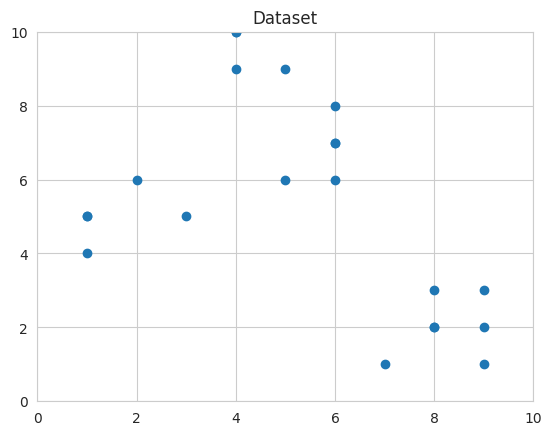

In [19]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,\
			7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, \
			1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()


From the above visualization, we can see that the optimal number of clusters should be around 3. But visualizing the data alone cannot always give the right answer. Hence we demonstrate the following steps.



We now define the following:-


Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters to each data point. Typically, the Euclidean distance metric is used.


                Distortion = 1/n * Σ(distance(point, centroid)^2)
Inertia: It is the sum of the squared distances of samples to their closest cluster center.


                 Inertia = Σ(distance(point, centroid)^2)
We iterate the values of k from 1 to n and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.
Step 3: Building the clustering model and calculating the values of the Distortion and Inertia:



In [20]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Step 4: Tabulating and Visualizing the Results
a) Using the different values of Distortion:

In [21]:
for key, val in mapping1.items():
	print(f'{key} : {val}')


1 : 3.625551331197001
2 : 2.0318238533112596
3 : 1.2423303391744152
4 : 0.8367738708386461
5 : 0.736979754424859
6 : 0.6599190753843538
7 : 0.6229256442161205
8 : 0.5192583095089573
9 : 0.4716392618899099


Next we will plot the graph of k versus WCSS

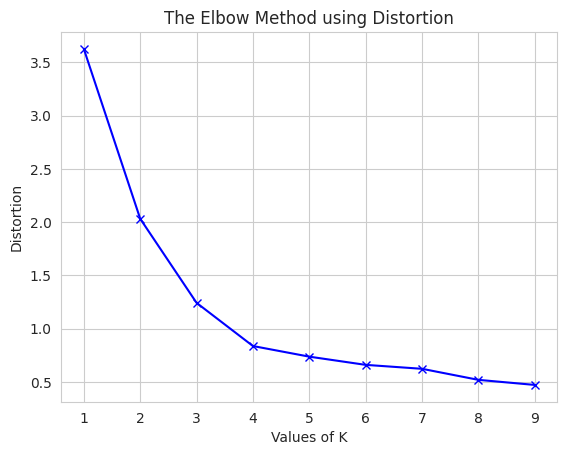

In [22]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()



b) Using the different values of Inertia:

In [23]:
for key, val in mapping2.items():
	print(f'{key} : {val}')


1 : 312.95238095238096
2 : 108.07142857142856
3 : 39.51746031746031
4 : 17.978571428571428
5 : 14.445238095238096
6 : 11.350000000000001
7 : 8.983333333333334
8 : 7.666666666666667
9 : 6.166666666666667


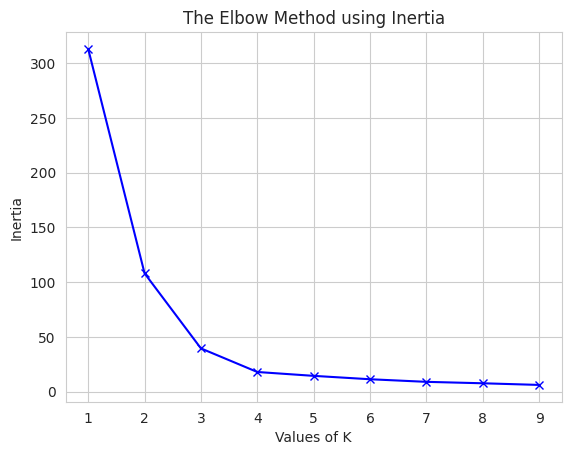

In [24]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.


Clustered Data Points For Different k Values
We will plot images of data points clustered for different values of k. For this, we will apply the k-means algorithm on the dataset by iterating on a range of k values.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


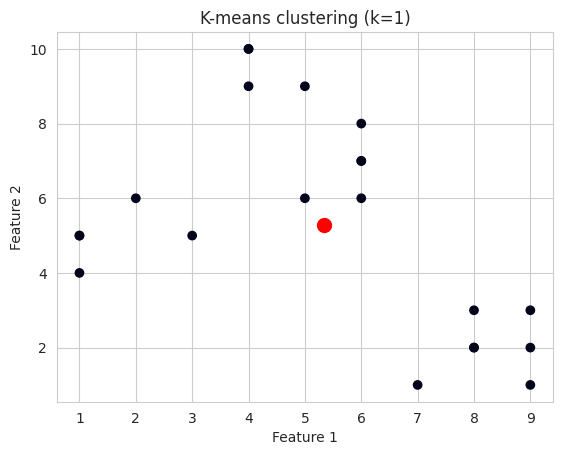

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


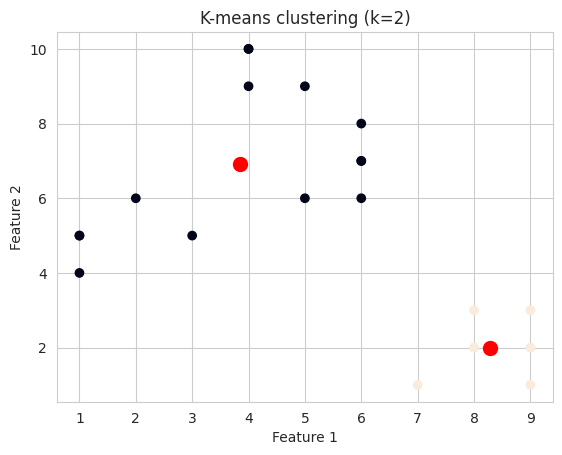

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


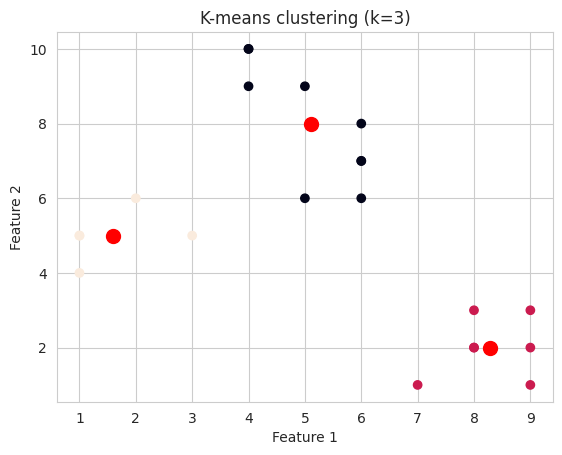

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


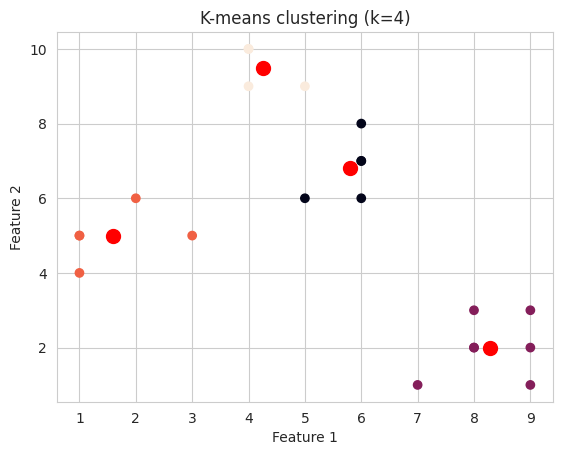

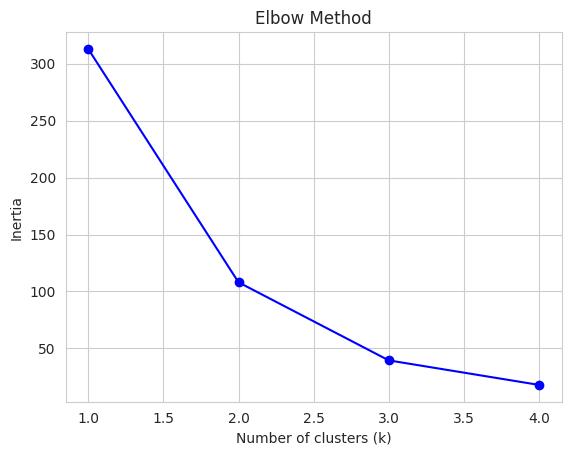

In [25]:
import matplotlib.pyplot as plt

# Create a range of values for k
k_range = range(1, 5)

# Initialize an empty list to
# store the inertia values for each k
inertia_values = []

# Fit and plot the data for each k value
for k in k_range:
	kmeans = KMeans(n_clusters=k, \
					init='k-means++', random_state=42)
	y_kmeans = kmeans.fit_predict(X)
	inertia_values.append(kmeans.inertia_)
	plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
	plt.scatter(kmeans.cluster_centers_[:, 0],\
				kmeans.cluster_centers_[:, 1], \
				s=100, c='red')
	plt.title('K-means clustering (k={})'.format(k))
	plt.xlabel('Feature 1')
	plt.ylabel('Feature 2')
	plt.show()

# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


Analysis of test data using K-Means Clustering in Python

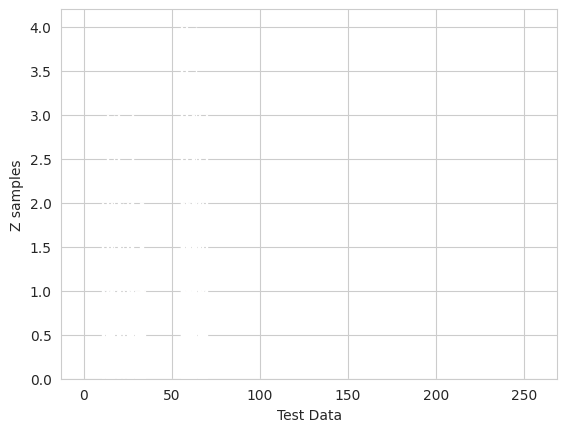

In [26]:
# importing required tools
import numpy as np
from matplotlib import pyplot as plt

# creating two test data
X = np.random.randint(10,35,(25,2))
Y = np.random.randint(55,70,(25,2))
Z = np.vstack((X,Y))
Z = Z.reshape((50,2))

# convert to np.float32
Z = np.float32(Z)

plt.xlabel('Test Data')
plt.ylabel('Z samples')

plt.hist(Z,256,[0,256])

plt.show()


Here ‘Z’ is an array of size 100, and values ranging from 0 to 255. Now, reshaped ‘z’ to a column vector. It will be more useful when more than one features are present. Then change the data to np.float32 type.

Now, apply the k-Means clustering algorithm to the same example as in the above test data and see its behavior.
Steps Involved:

1) First we need to set a test data.

2) Define criteria and apply kmeans().

3) Now separate the data.

4) Finally Plot the data.

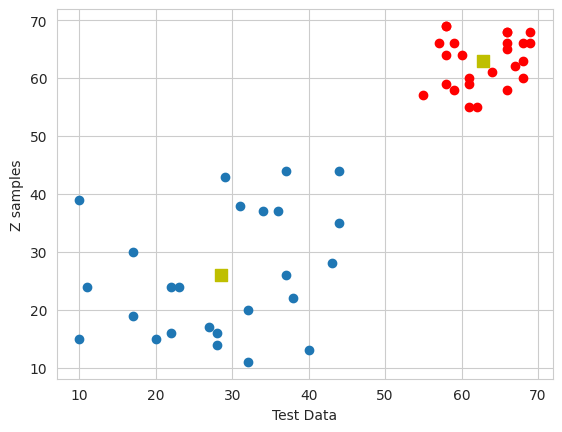

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

X = np.random.randint(10,45,(25,2))
Y = np.random.randint(55,70,(25,2))
Z = np.vstack((X,Y))

# convert to np.float32
Z = np.float32(Z)

# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center = cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Test Data'),plt.ylabel('Z samples')
plt.show()


This example is meant to illustrate where k-means will produce intuitively possible clusters.

Applications:
1) Identifying Cancerous Data.
2) Prediction of Students’ Academic Performance.
3) Drug Activity Prediction.